#1. Importing Libraries

In [ ]:
#The code below imports the necessary libraries that will be used for the analysis,
#including pandas, numpy, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline #Enables inline for matplotlib

#Imports the nltk package to be used for sentiment analysis.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Imports warnings
import warnings
warnings.filterwarnings("ignore")

#2. Loading Data

In [ ]:
url = 'https://raw.githubusercontent.com/gmindick/Sentiment-Analysis-RoBERTa-Model-/main/Review%20500.csv' #Stores my github
#repo into a variable.
df = pd.read_csv(url) #Loads the data into a pandas dataframe.
df #Shows the dataframe.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


#3. Exploratory Data Analysis

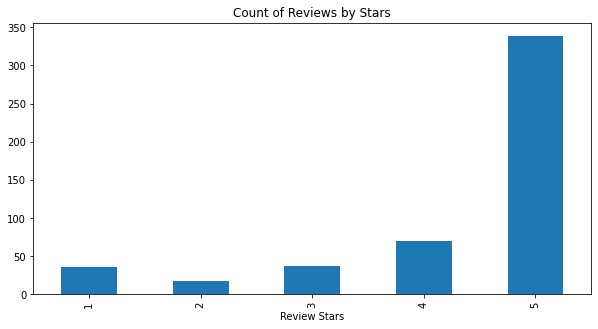

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5)) #Creates a dataframe of score values that is sorted by 
          #the value counts. It then creates a bar plot with the information.
ax.set_xlabel('Review Stars') #Labels the x-axis name.
plt.show() #Shows the plot.

#4. Basic NLTK

In [ ]:
example = df['Text'][50] #This stores some example text from the data from 
#Amazon Fine Food Reviews.
print(example)#Prints the example.

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
import nltk #Imports the nltk package.
nltk.download('punkt') #Downloads the 'punkt' package from nltk.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = nltk.word_tokenize(example) #Tokenizes the example variable we created.
tokens[:10] #Displays up to ten tokens from the example.

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [ ]:
import nltk #Imports the nltk package.
nltk.download('averaged_perceptron_tagger') #Downloads the averaged_perceptron_tagger
#package from nltk.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tagged = nltk.pos_tag(tokens) #Creates part of speech tagged tokens to use for our
#sentiment analysis.
tagged[:10] #Displays the first ten pos tagged tokens.

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
import nltk #Imports the nltk package.
nltk.download('maxent_ne_chunker') #Downloads the maxent_ne_chunker package
#from nltk.
nltk.download('words') #Downloads the words package from nltk.

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged) #Creates an entities variable that
#chunks the tagged tokens together to be used for our analysis.
entities.pprint() #Displays the new tokens.

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


#5. VADER Seniment Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer #Imports the SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #Imports the tqdm from tqdm.notebook.
nltk.download('vader_lexicon') #Downloads the VADER lexicon from nltk.

sia = SentimentIntensityAnalyzer() #Creates a variable for our SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores(example) #This displays the polarity scores for the tokens
#in our example variable.

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text) # The code creates polarity scores for the entire dataset.

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T #Creates a pandas dataframe using the polarity scores.
vaders = vaders.reset_index().rename(columns={'index': 'Id'}) #Resets the column indexes for the dataframe.
vaders = vaders.merge(df, how='left') #Left joins the polarity scores with the intitial dataframe that was created.

In [ ]:
vaders.head() #Shows the first few rows of the new dataset including polarity scores.

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#6. Plot VADER results

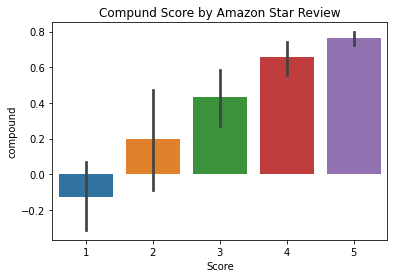

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound') #Creates a barplot variable using seaborn.
ax.set_title('Compund Score by Amazon Star Review') #Titles the barplot.
plt.show() #Shows the plot.

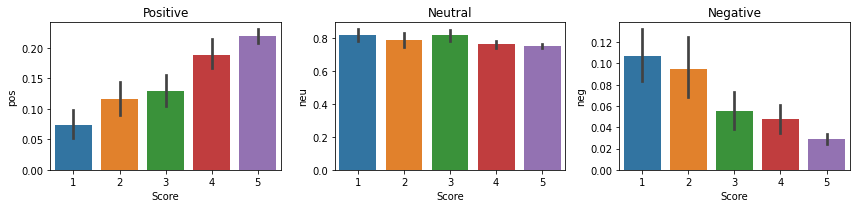

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3)) #Creates 3 subplot variables so we can
#create multiple barplot.
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0]) #Creates the barplot based on positive polarity.
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1]) #Creates the second barplot based on neutral polarity.
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2]) #Creates the third barplot based on negative polarity.
#Creates titles for the plots
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout() #Makes the layout of the plots 'tight'.
plt.show() #Shows the plots.

#7. Roberta Pretrained Model

In [ ]:
#!pip install transformers
#^this installs transformers if we need it.

#Installs the libraries we need including the AutoTokenizer, AutoModelForSequenceClassification, and softmax.
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #Creates a ROBERTa sentiment model variable.
tokenizer = AutoTokenizer.from_pretrained(MODEL) #Creates a tokenizer using the model we just created.
model = AutoModelForSequenceClassification.from_pretrained(MODEL) #Creates a new variable that 
#classifies the sequences on the new model.

In [ ]:
# VADER results on example
print(example) #Prints out example from earlier.
sia.polarity_scores(example) #Shows the polarity scores on the VADER example.

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# The code below creates and runs the ROBERTa model.
encoded_text = tokenizer(example, return_tensors='pt') #Tokenizes the text.
output = model(**encoded_text) #Creates the desires output.
scores = output[0][0].detach().numpy() #Shows the scores.
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict) #Prints the ROBERTa model scores for negative, neutral, and positive.

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [ ]:
#Takes the code from above and creates a function that we can use to determine 
#ROBERTa model scores on data we would like to input into it.
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
#This code loops the previous VADER data we had so that the polarity scores
#from previous are iterated over the VADER data. Therefore, it will show
#both the VADER and ROBERTa results.
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [ ]:
results_df = pd.DataFrame(res).T #Creates a new dataframe including the ROBERTa scores.
results_df = results_df.reset_index().rename(columns={'index': 'Id'}) #Resets the index.
results_df = results_df.merge(df, how='left') #Left joins the dataframes together.

#8. Compare Scores between models

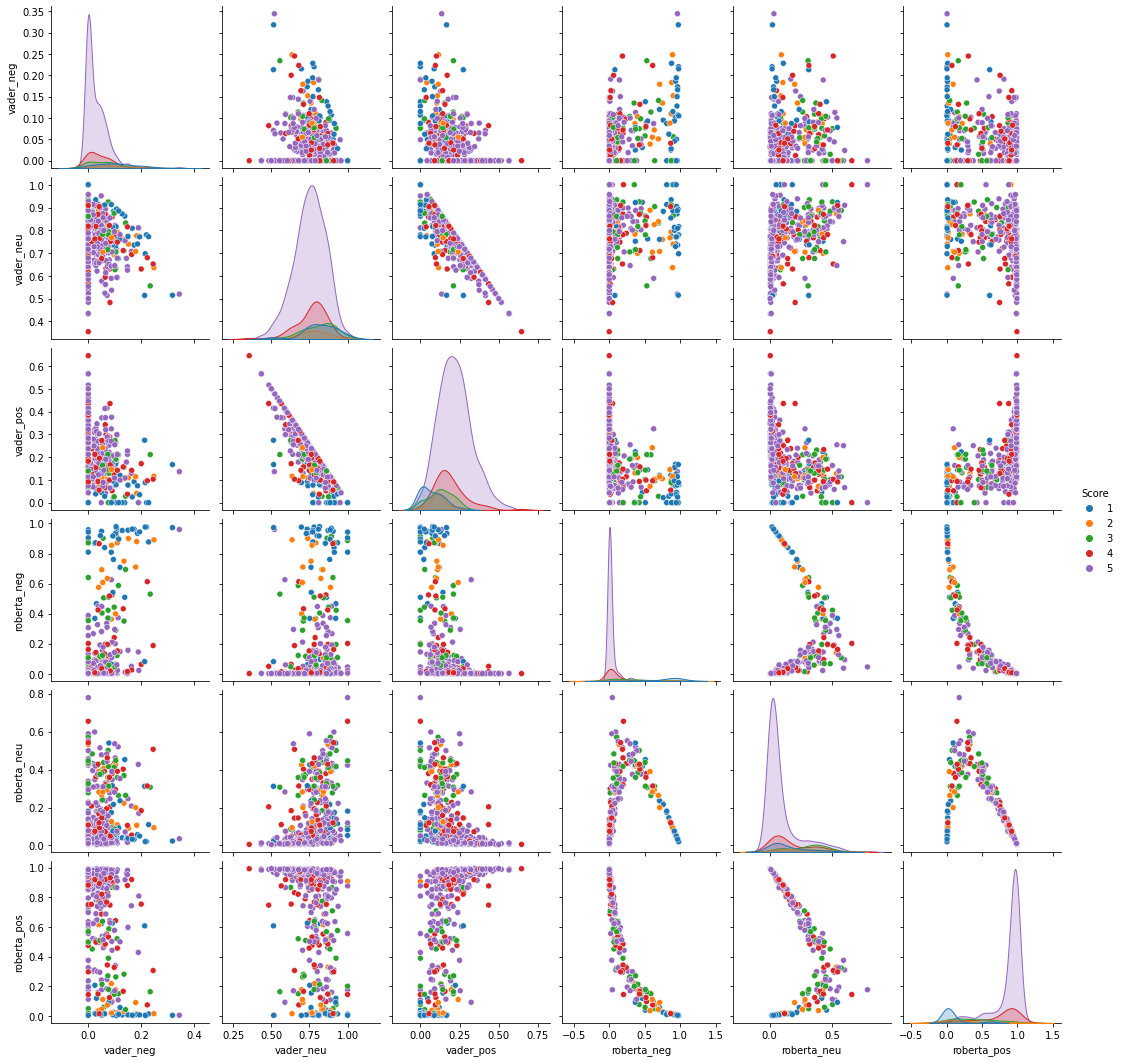

In [ ]:
#The code below takes both the VADER and ROBERTa polarity scores and combines 
#all of them into a scatterplot matrix we can compare and contrast below.
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show() #This shows the scatterplot matrix.

####8a. Positive 1-Star and Negative 5-Star Reviews

####Positive 1 star

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0] #This queries and displays
    #a review that was given a 1 star review, but was determined to be positive on the polarity score from the ROBERTa model.

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0] #This queries and displays
    #a review that was given a 1 star review, but was determined to be positive on the polarity score from the VADER model.

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

#### Negative sentiment 5-Star view

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0] #This queries and displays
    #a review that was given a 5 star review, but was determined to be negative on the polarity score from the ROBERTa model.

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0] #This queries and displays
    #a review that was given a 5 star review, but was determined to be positive on the polarity score from the VADER model.

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

8b. 30 Reviews result

In [ ]:
df1 = results_df[["Id","vader_neg","vader_neu","vader_pos","vader_compound","roberta_neg","roberta_neu","roberta_pos","Text"]] #Creates
#a dataframe with only the polarity scores and the text.
df1 #Displays the dataframe.

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,"Okay, I should not eat potato chips, nor shoul..."


In [ ]:
df1.head(30) #Displays the top 30 reviews in the dataframe.

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,0.006130,0.021796,0.972074,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,0.001305,0.007774,0.990921,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,0.002029,0.005685,0.992285,This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,0.003874,0.094156,0.901970,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,0.003103,0.055912,0.940984,This is a very healthy dog food. Good for thei...
